In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start = '2017-01-01'
end = '2021-10-01'

In [3]:
data=yf.download('CL=F PTTEP.BK',start =start,end=end,periods=1)

[*********************100%***********************]  2 of 2 completed


In [4]:
data

Adj Close                  Close                High           \
                 CL=F    PTTEP.BK       CL=F PTTEP.BK       CL=F PTTEP.BK   
Date                                                                        
2017-01-03  52.330002         NaN  52.330002      NaN  55.240002      NaN   
2017-01-04  53.259998   74.474815  53.259998    98.50  53.430000    98.75   
2017-01-05  53.759998   74.096779  53.759998    98.00  54.119999    99.50   
2017-01-06  53.990002   74.474815  53.990002    98.50  54.320000    99.50   
2017-01-09  51.959999   73.907745  51.959999    97.75  53.830002    98.75   
...               ...         ...        ...      ...        ...      ...   
2021-09-24  73.980003         NaN  73.980003      NaN  74.269997      NaN   
2021-09-27  75.449997  111.294357  75.449997   117.00  75.750000   117.50   
2021-09-28  75.290001  113.196823  75.290001   119.00  76.669998   121.00   
2021-09-29  74.830002  113.196823  74.830002   119.00  75.790001   120.00   
2021-09-30  75.029999  111.769974  75.029999   117.50  76.070000   119.50   

                  Low                Open             Volume              
                 CL=F PTTEP.BK       CL=F PTTEP.BK      CL=F    PTTEP.BK  
Date                                                                      
2017-01-03  52.110001      NaN  54.200001      NaN  727793.0         NaN  
2017-01-04  52.150002    96.00  52.490002    96.25  512641.0  17352200.0  
2017-01-05  52.790001    98.00  53.389999    98.50  517362.0  18246200.0  
2017-01-06  53.320000    97.25  53.730000    98.00  528333.0  11993700.0  
2017-01-09  51.759998    97.50  53.750000    98.50  564893.0   4042300.0  
...               ...      ...        ...      ...       ...         ...  
2021-09-24  72.809998      NaN  73.239998      NaN  350382.0         NaN  
2021-09-27  74.160004   114.50  74.190002   115.00  417829.0  25185600.0  
2021-09-28  74.239998   118.00  75.430000   118.50  476143.0  34817500.0  
2021-09-29  73.739998   117.00  74.379997   117.00  424193.0  13055700.0  
2021-09-30  73.139999   117.00  74.779999   119.00  583189.0  11996900.0  

[1231 rows x 12 columns]

# note we have 2 way to lead shift today predict tomorrow
# and yesterday predict to day

In [5]:
df=data['Adj Close']
df

,CL=F,PTTEP.BK
Date,,
2017-01-03,52.330002,NaN
2017-01-04,53.259998,74.474815
2017-01-05,53.759998,74.096779
2017-01-06,53.990002,74.474815
2017-01-09,51.959999,73.907745
...,...,...
2021-09-24,73.980003,NaN
2021-09-27,75.449997,111.294357
2021-09-28,75.290001,113.196823


In [6]:
df['PTTEP Shift']=df['PTTEP.BK'].shift(1)
df

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_65421/704209468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PTTEP Shift']=df['PTTEP.BK'].shift(1)


,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2017-01-03,52.330002,NaN,NaN
2017-01-04,53.259998,74.474815,NaN
2017-01-05,53.759998,74.096779,74.474815
2017-01-06,53.990002,74.474815,74.096779
2017-01-09,51.959999,73.907745,74.474815
...,...,...,...
2021-09-24,73.980003,NaN,107.489426
2021-09-27,75.449997,111.294357,NaN
2021-09-28,75.290001,113.196823,111.294357


In [7]:
# find return 
df['PTTEP.BK']/df['PTTEP Shift']-1

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05   -0.005076
2017-01-06    0.005102
2017-01-09   -0.007614
                ...   
2021-09-24         NaN
2021-09-27         NaN
2021-09-28    0.017094
2021-09-29    0.000000
2021-09-30   -0.012605
Length: 1231, dtype: float64

In [11]:
df['PTTEP.BK']/df['PTTEP.BK'].shift(1)-1

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05   -0.005076
2017-01-06    0.005102
2017-01-09   -0.007614
                ...   
2021-09-24         NaN
2021-09-27         NaN
2021-09-28    0.017094
2021-09-29    0.000000
2021-09-30   -0.012605
Name: PTTEP.BK, Length: 1231, dtype: float64

In [9]:
df['return'] = df['PTTEP.BK']/df['PTTEP Shift']-1

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_65421/102847901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = df['PTTEP.BK']/df['PTTEP Shift']-1


In [10]:
df

,CL=F,PTTEP.BK,PTTEP Shift,return
Date,,,,
2017-01-03,52.330002,NaN,NaN,NaN
2017-01-04,53.259998,74.474815,NaN,NaN
2017-01-05,53.759998,74.096779,74.474815,-0.005076
2017-01-06,53.990002,74.474815,74.096779,0.005102
2017-01-09,51.959999,73.907745,74.474815,-0.007614
...,...,...,...,...
2021-09-24,73.980003,NaN,107.489426,NaN
2021-09-27,75.449997,111.294357,NaN,NaN
2021-09-28,75.290001,113.196823,111.294357,0.017094


In [12]:
df=data['Adj Close'].pct_change()

In [13]:
df['PTTEP.BK'].shift(-1)

Date
2017-01-03         NaN
2017-01-04   -0.005076
2017-01-05    0.005102
2017-01-06   -0.007614
2017-01-09   -0.017903
                ...   
2021-09-24    0.035398
2021-09-27    0.017094
2021-09-28    0.000000
2021-09-29   -0.012605
2021-09-30         NaN
Name: PTTEP.BK, Length: 1231, dtype: float64

In [14]:
df['PTTEP Shift']=df['PTTEP.BK'].shift(-1)

In [15]:
df.dropna(inplace=True)

In [16]:
df

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2021-09-23,0.014814,0.004445,0.000000
2021-09-24,0.009277,0.000000,0.035398
2021-09-27,0.019870,0.035398,0.017094


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

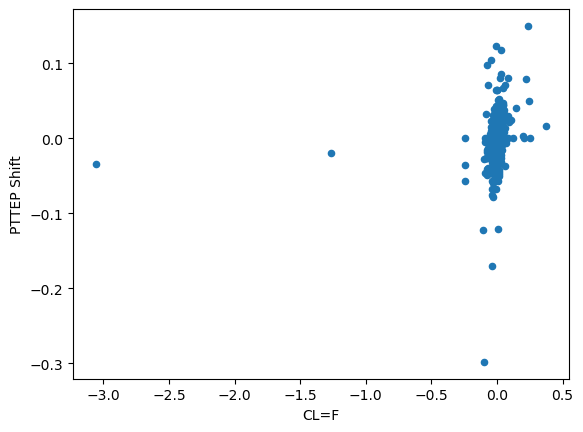

In [17]:
df.plot.scatter(x='CL=F',y='PTTEP Shift')

In [ ]:
# clear outliner

In [22]:
df.loc[df['CL=F']<-.5]

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2020-04-20,-3.059661,0.03268,-0.034810
2020-04-21,-1.266011,-0.03481,-0.019672


In [23]:
df =df.loc[df['CL=F']>-.5]

In [24]:
df

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2017-01-05,0.009388,-0.005076,0.005102
2017-01-06,0.004278,0.005102,-0.007614
2017-01-09,-0.037600,-0.007614,-0.017903
2017-01-10,-0.021940,-0.017903,0.005208
2017-01-11,0.028139,0.005208,0.002591
...,...,...,...
2021-09-23,0.014814,0.004445,0.000000
2021-09-24,0.009277,0.000000,0.035398
2021-09-27,0.019870,0.035398,0.017094


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

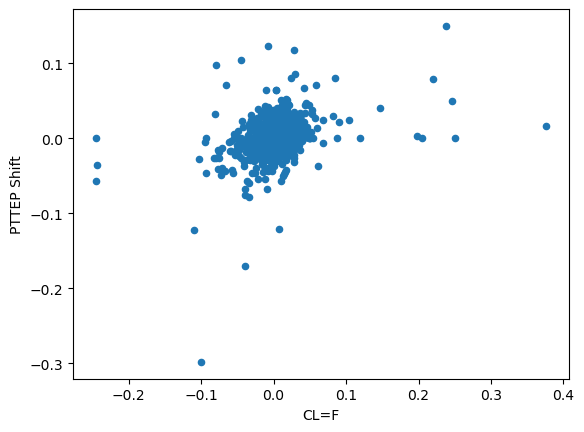

In [25]:
df.plot.scatter(x='CL=F',y='PTTEP Shift')

<AxesSubplot:xlabel='Date'>

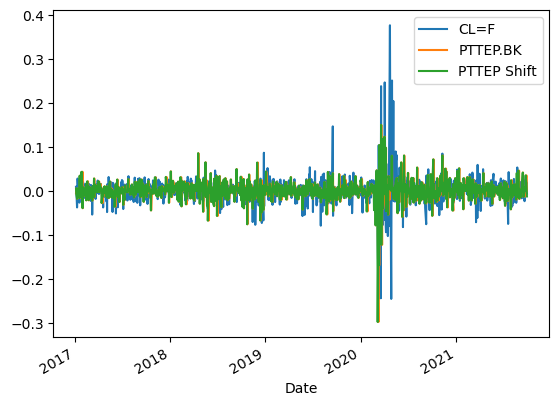

In [26]:
df.plot()

<AxesSubplot:xlabel='Date'>

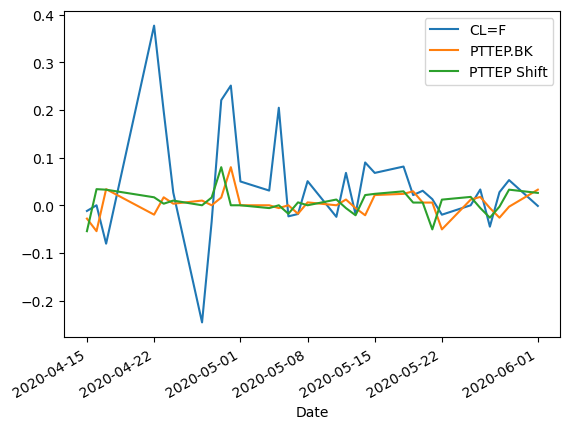

In [27]:
df.loc['2020-04-15':'2020-06-01'].plot()

In [28]:
df_clean = df.loc[:'2020-04-13'].append(df.loc['2020-05-10':])

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_65421/2264704435.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df.loc[:'2020-04-13'].append(df.loc['2020-05-10':])


In [29]:
df_clean.loc['2020-04-12':'2020-05-20']

,CL=F,PTTEP.BK,PTTEP Shift
Date,,,
2020-04-13,-0.015378,-0.003135,0.012579
2020-05-11,-0.024252,0.000000,0.012048
2020-05-12,0.067937,0.012048,-0.005953
2020-05-13,-0.019007,-0.005953,-0.020958
2020-05-14,0.089759,-0.020958,0.021407
2020-05-15,0.067852,0.021407,0.023952
2020-05-18,0.081210,0.023952,0.029240
2020-05-19,0.021370,0.029240,0.005682
2020-05-20,0.030462,0.005682,0.005650


<AxesSubplot:xlabel='Date'>

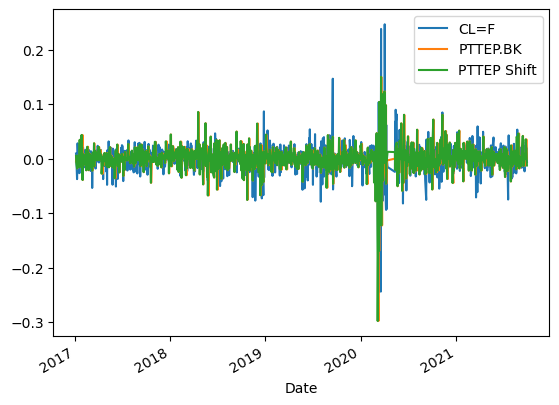

In [30]:
df_clean.plot()

<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

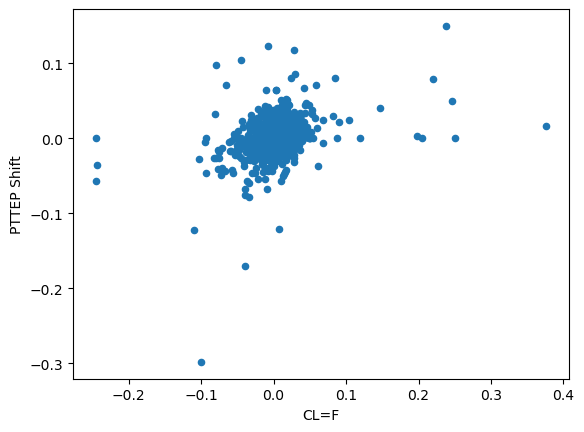

In [31]:
df.plot.scatter(x='CL=F',y='PTTEP Shift')

In [34]:
#create linear regression line
X= df_clean['CL=F']
y=df_clean['PTTEP Shift']
m,c=np.polyfit(X,y,1)

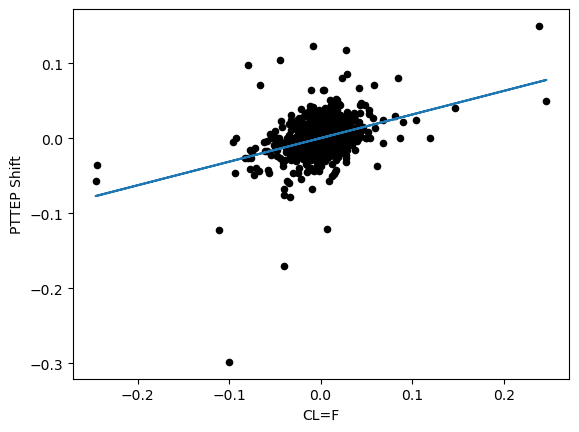

In [35]:
df_clean.plot.scatter(x='CL=F',y='PTTEP Shift', c='k')
plt.plot(X,m*X+c)

In [36]:
df_clean.drop('PTTEP.BK',axis=1,inplace=True)

In [37]:
Lower_limit = df_clean.quantile(0.01)
Upper_limit=df_clean.quantile(0.99)

In [38]:
Lower_limit,Upper_limit

(CL=F          -0.075635
 PTTEP Shift   -0.053263
 Name: 0.01, dtype: float64,
 CL=F           0.059159
 PTTEP Shift    0.064666
 Name: 0.99, dtype: float64)

In [39]:
(df_clean < Lower_limit)| (df_clean>Upper_limit)

,CL=F,PTTEP Shift
Date,,
2017-01-05,False,False
2017-01-06,False,False
2017-01-09,False,False
2017-01-10,False,False
2017-01-11,False,False
...,...,...
2021-09-23,False,False
2021-09-24,False,False
2021-09-27,False,False


In [41]:
df_cleaner=df_clean[~((df_clean < Lower_limit)| (df_clean > Upper_limit)).any(1)]

In [42]:
df_cleaner

,CL=F,PTTEP Shift
Date,,
2017-01-05,0.009388,0.005102
2017-01-06,0.004278,-0.007614
2017-01-09,-0.037600,-0.017903
2017-01-10,-0.021940,0.005208
2017-01-11,0.028139,0.002591
...,...,...
2021-09-23,0.014814,0.000000
2021-09-24,0.009277,0.035398
2021-09-27,0.019870,0.017094


<AxesSubplot:xlabel='CL=F', ylabel='PTTEP Shift'>

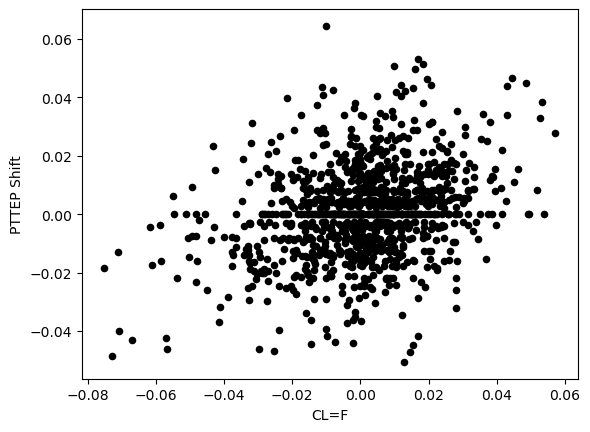

In [43]:
df_cleaner.plot.scatter(x='CL=F',y='PTTEP Shift', c='k')


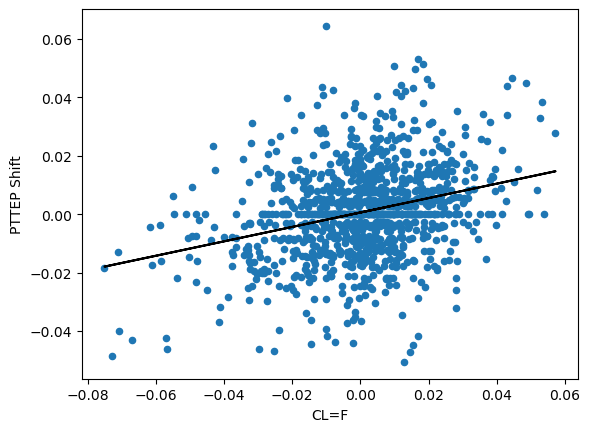

In [46]:
#create linear regression line
X= df_cleaner['CL=F']
y=df_cleaner['PTTEP Shift']
m,c=np.polyfit(X,y,1)
df_cleaner.plot.scatter(x='CL=F',y='PTTEP Shift', )
plt.plot(X,m*X+c,color='k')

In [47]:
print('slope ='+str(m))
print('intercept ='+str(c))

slope =0.24668086028044284
intercept =0.0005534681967951976


In [48]:
df_cleaner.corr()

,CL=F,PTTEP Shift
CL=F,1.000000,0.297379
PTTEP Shift,0.297379,1.000000


<AxesSubplot:xlabel='Date'>

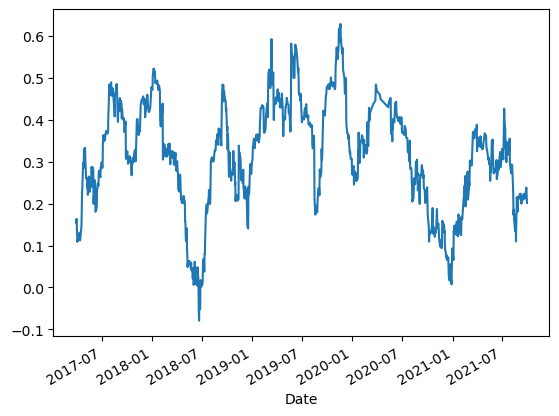

In [49]:
df_cleaner['CL=F'].rolling(60).corr(df_cleaner['PTTEP Shift']).plot()

<AxesSubplot:xlabel='Date'>

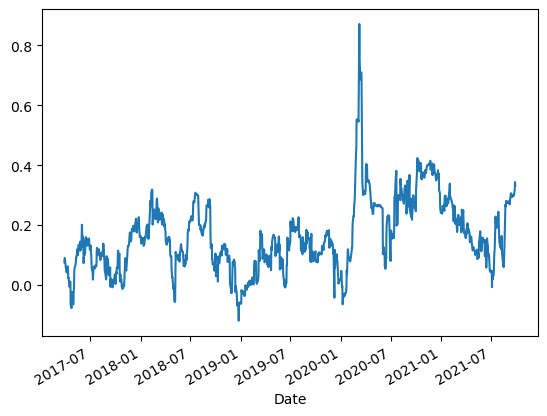

In [50]:
df['CL=F'].rolling(60).corr(df['PTTEP.BK']).plot()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [52]:
data= yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK',start=start,end=end)

[*********************100%***********************]  5 of 5 completed


In [53]:
df=data['Adj Close']

In [54]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.146652,29.128029,74.474815,48.913532
2017-01-05,53.759998,28.555843,29.664600,74.096771,49.104599
2017-01-06,53.990002,28.555843,29.817902,74.474815,48.913532
2017-01-09,51.959999,28.555843,29.357981,73.907753,48.340332
...,...,...,...,...,...
2021-09-24,73.980003,NaN,NaN,NaN,NaN
2021-09-27,75.449997,75.753326,37.146832,111.294357,58.820950
2021-09-28,75.290001,75.015472,37.146832,113.196823,60.726086


In [55]:
df=df.fillna(method='ffill').pct_change().dropna()

In [56]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006896,0.013055,-0.017903,0.003952
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [57]:
df[(df.iloc[:,1:]==0).all(1)]
# find value is equal 0 it mean they are not making any change in trading

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-13,-0.012073,0.0,0.0,0.0,0.0
2017-02-13,-0.017267,0.0,0.0,0.0,0.0
2017-04-06,0.010753,0.0,0.0,0.0,0.0
2017-04-13,0.001318,0.0,0.0,0.0,0.0
2017-05-01,-0.009933,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-06-03,-0.000291,0.0,0.0,0.0,0.0
2021-07-26,-0.002220,0.0,0.0,0.0,0.0
2021-07-28,0.010328,0.0,0.0,0.0,0.0


In [58]:
df[(df['PTT.BK']==0)]

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-13,-0.012073,0.000000,0.0,0.000000,0.000000
2017-01-19,0.005677,-0.006944,0.0,-0.002645,0.003831
2017-01-30,-0.010156,-0.013698,0.0,0.043478,0.007353
2017-02-01,0.020261,-0.006993,0.0,0.007653,-0.018450
2017-02-02,-0.006310,0.000000,0.0,-0.012658,0.000000
...,...,...,...,...,...
2021-09-15,0.030514,0.003145,0.0,0.000000,-0.012346
2021-09-20,-0.023343,-0.009677,0.0,-0.013274,-0.028926
2021-09-22,0.023668,0.003215,0.0,0.000000,0.008403


In [59]:
# clean data remove change 0 % cause no change
df=df[~(df.iloc[:,1:]==0).all(1)]

In [60]:
(df==0).sum()

CL=F         43
GPSC.BK     148
PTT.BK      194
PTTEP.BK    129
PTTGC.BK    117
dtype: int64

In [61]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006896,0.013055,-0.017903,0.003952
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2021-09-23,0.014814,0.000000,0.012658,0.004444,0.008333
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [62]:
df = df[['CL=F','GPSC.BK','PTTEP.BK','PTTGC.BK','PTT.BK']]

<AxesSubplot:xlabel='Date'>

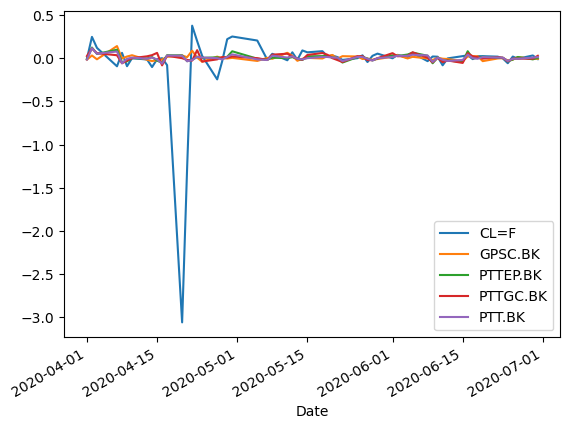

In [63]:
df.loc['2020-04':'2020-06'].plot()

In [65]:
start_remove = pd.to_datetime('2020-04-10')
end_remove = pd.to_datetime('2020-05-10')
df=df.loc[(df.index<start_remove)|(df.index>end_remove)]

<AxesSubplot:xlabel='Date'>

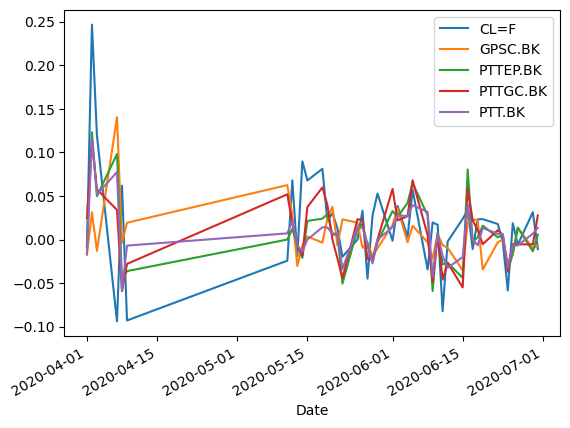

In [68]:
df.loc['2020-04':'2020-06'].plot()

In [69]:
X = df.iloc[:1000,:-1]
y = df.iloc[:1000,-1]

In [70]:
Lower_limit = df.quantile(0.01)
Upper_limit =df.quantile(0.99)

In [71]:
df=df[~((df<Lower_limit)|(df>Upper_limit)).any(1)]

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_65421/82063418.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<Lower_limit)|(df>Upper_limit)).any(1)]


In [72]:
df

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,-0.005076,0.003906,0.018421
2017-01-06,0.004278,0.000000,0.005102,-0.003891,0.005168
2017-01-09,-0.037600,0.000000,-0.007614,-0.011719,-0.015424
2017-01-10,-0.021940,0.006896,-0.017903,0.003952,0.013055
2017-01-11,0.028139,0.006849,0.005208,-0.003937,-0.007732
...,...,...,...,...,...
2021-09-23,0.014814,0.000000,0.004444,0.008333,0.012658
2021-09-27,0.019870,-0.012821,0.035398,0.020661,0.012500
2021-09-28,-0.002121,-0.009740,0.017094,0.032389,0.000000


In [73]:
df.describe()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000
mean,0.000828,0.001887,0.001784,0.001436,0.001073
std,0.018862,0.021471,0.017446,0.018018,0.014838
min,-0.075059,-0.059761,-0.053498,-0.049383,-0.040000
25%,-0.008973,-0.009639,-0.008322,-0.009367,-0.006525
50%,0.001889,0.000000,0.000000,0.000000,0.000000
75%,0.012188,0.012572,0.009102,0.010688,0.007143
max,0.058570,0.158672,0.118143,0.109091,0.100719


In [74]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
scores = cross_val_score(model,X,y,scoring ='r2',cv=5)
scores

array([0.36702739, 0.42309756, 0.59229265, 0.84983051, 0.6272397 ])

In [76]:
df.corr()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
CL=F,1.000000,0.013168,0.200981,0.153928,0.185155
GPSC.BK,0.013168,1.000000,0.184212,0.238019,0.233075
PTTEP.BK,0.200981,0.184212,1.000000,0.547363,0.685045
PTTGC.BK,0.153928,0.238019,0.547363,1.000000,0.608335
PTT.BK,0.185155,0.233075,0.685045,0.608335,1.000000


In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)
scores = cross_val_score(model,X_train,y_train,scoring ='r2',cv=5)
scores

array([0.53431039, 0.68695622, 0.63461789, 0.82180803, 0.66581576])

In [77]:
model = LinearRegression()
reg = model.fit(X_train,y_train)


In [78]:
y_pred = reg.predict(X_test)

In [79]:
reg.score(X_test,y_test)

0.5629310204595068

In [80]:
print('MAE =',metrics.mean_absolute_error(y_test,y_pred))
print('MSE =',metrics.mean_squared_error(y_test,y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE = 0.008854254433740877
MSE = 0.0001450269096884032
RMSE = 0.012042711890948948


In [81]:
df.corr()

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
CL=F,1.000000,0.013168,0.200981,0.153928,0.185155
GPSC.BK,0.013168,1.000000,0.184212,0.238019,0.233075
PTTEP.BK,0.200981,0.184212,1.000000,0.547363,0.685045
PTTGC.BK,0.153928,0.238019,0.547363,1.000000,0.608335
PTT.BK,0.185155,0.233075,0.685045,0.608335,1.000000


In [82]:
reg.coef_

array([0.01563558, 0.03658394, 0.47237157, 0.27246255])

In [83]:
live_data=reg.predict(df.iloc[1000:,:-1])

In [84]:
live_data

array([-4.73627976e-04, -3.35247524e-03,  2.55175734e-03,  5.55821957e-03,
        8.29819576e-03,  5.10720622e-03, -3.65793580e-03, -3.90514756e-03,
       -9.63633256e-04,  2.38030943e-03, -9.10870057e-03,  5.13972023e-03,
       -7.05583127e-03, -8.09739794e-03,  1.06058310e-02, -8.26358252e-03,
       -9.63804446e-03, -8.72948180e-03,  7.41149610e-03,  8.86943253e-04,
        9.09575944e-03,  5.48836342e-04, -4.63527533e-03,  2.26298650e-03,
       -1.10530641e-02,  6.76800499e-03,  2.89847960e-03,  6.19197034e-03,
        9.26180142e-03, -1.79767345e-02, -2.03897971e-02, -4.72297529e-03,
        2.55518174e-02, -1.46358033e-02, -3.28785802e-03,  1.12917338e-02,
       -1.48304925e-02, -1.46206131e-02,  1.01117809e-02,  4.74826070e-03,
       -7.23611445e-03, -4.36547739e-03,  5.04326072e-03, -2.45742540e-02,
        1.73233268e-02,  2.26156777e-03,  2.13063541e-03, -1.22076401e-02,
       -5.80827553e-04,  6.18159051e-03,  1.37131850e-02, -5.61205571e-03,
        7.36955396e-04,  

In [85]:
test=df.iloc[1000:]

In [86]:
test['Pred']=live_data

/var/folders/0j/079zvm2s3dxclvzgz86_k33m0000gn/T/ipykernel_65421/4080423831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred']=live_data


In [87]:
test

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-05-25,0.000303,0.025641,0.012821,-0.027237,0.013072,-0.000474
2021-05-27,0.009666,0.039286,-0.012658,0.004000,0.000000,-0.003352
2021-05-28,-0.007928,-0.010309,0.004273,0.003984,0.012903,0.002552
2021-05-31,0.000000,0.013889,0.008511,0.003968,0.006369,0.005558
2021-06-01,0.021110,0.051370,0.008439,0.007905,0.050633,0.008298
...,...,...,...,...,...,...
2021-09-23,0.014814,0.000000,0.004444,0.008333,0.012658,0.004550
2021-09-27,0.019870,-0.012821,0.035398,0.020661,0.012500,0.022141
2021-09-28,-0.002121,-0.009740,0.017094,0.032389,0.000000,0.016459


<AxesSubplot:xlabel='Date'>

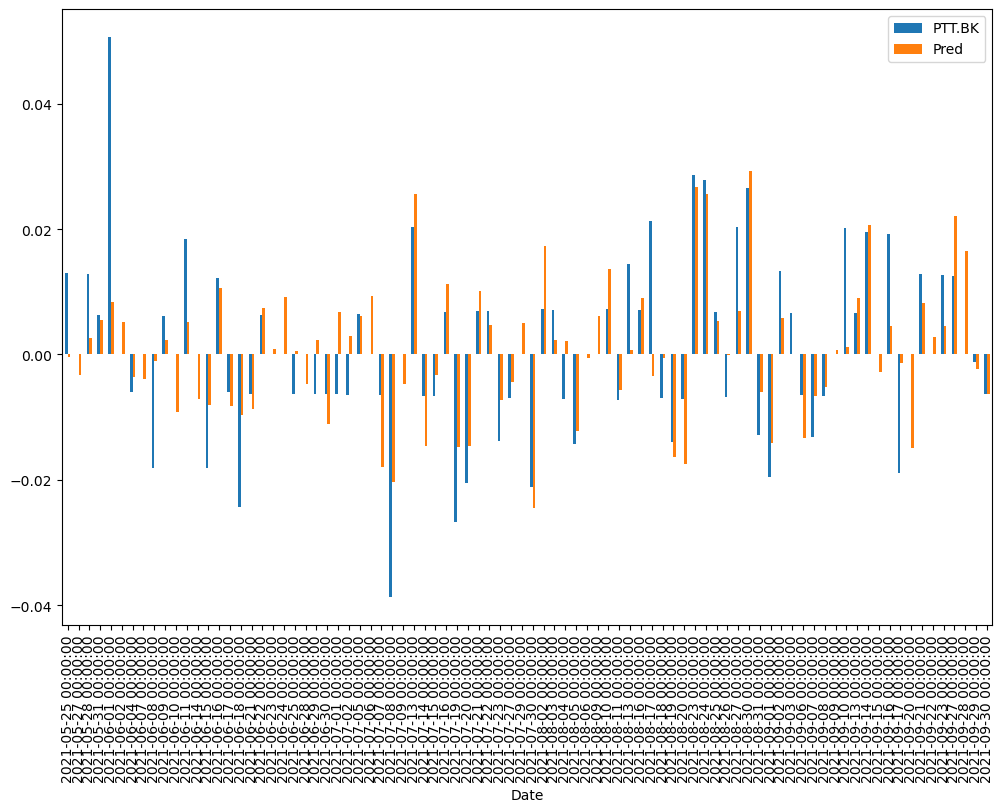

In [88]:
test.iloc[:,-2:].plot(kind='bar',figsize=(12,8))

# create graph

In [89]:
test+1

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-05-25,1.000303,1.025641,1.012821,0.972763,1.013072,0.999526
2021-05-27,1.009666,1.039286,0.987342,1.004000,1.000000,0.996648
2021-05-28,0.992072,0.989691,1.004273,1.003984,1.012903,1.002552
2021-05-31,1.000000,1.013889,1.008511,1.003968,1.006369,1.005558
2021-06-01,1.021110,1.051370,1.008439,1.007905,1.050633,1.008298
...,...,...,...,...,...,...
2021-09-23,1.014814,1.000000,1.004444,1.008333,1.012658,1.004550
2021-09-27,1.019870,0.987179,1.035398,1.020661,1.012500,1.022141
2021-09-28,0.997879,0.990260,1.017094,1.032389,1.000000,1.016459


In [91]:
(test+1).cumprod(axis=0)

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-05-25,1.000303,1.025641,1.012821,0.972763,1.013072,0.999526
2021-05-27,1.009972,1.065934,1.000000,0.976654,1.013072,0.996175
2021-05-28,1.001965,1.054945,1.004273,0.980545,1.026144,0.998717
2021-05-31,1.001965,1.069597,1.012821,0.984436,1.032680,1.004269
2021-06-01,1.023116,1.124542,1.021368,0.992218,1.084967,1.012602
...,...,...,...,...,...,...
2021-09-23,1.108239,1.153894,0.993085,1.038849,1.052817,1.013376
2021-09-27,1.130259,1.139100,1.028238,1.060313,1.065978,1.035813
2021-09-28,1.127863,1.128005,1.045815,1.094655,1.065978,1.052861


<AxesSubplot:xlabel='Date'>

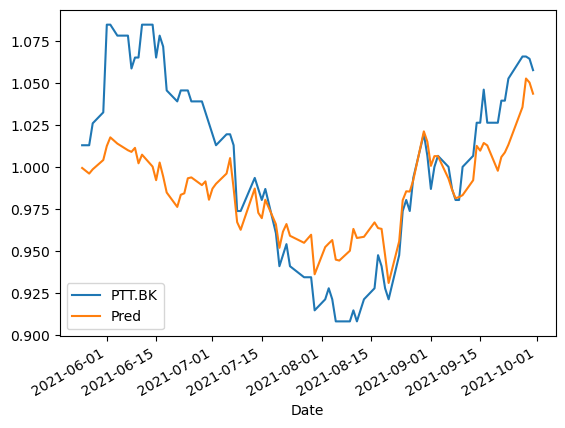

In [93]:
(test+1).iloc[:,-2:].cumprod().plot()